In [1]:
# Competition hosted by Kaggle
# URL: https://www.kaggle.com/c/titanic
# Predicting whether a person survived the Titanic, using Tensorflow 2.0 Artificial Neural Networks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
import math
import os
import datetime
%matplotlib inline

In [3]:
#Import train and test data, store them in a list, then make changes to both. 

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

combine = [train_df,test_df]

In [5]:
#Exploratory Data Analysis

In [6]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Graphing

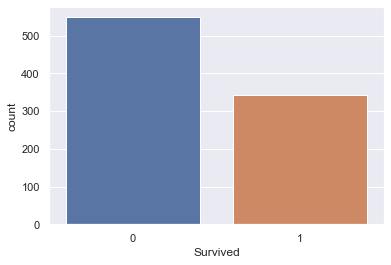

In [11]:
sns.countplot(x='Survived',data=train_df)

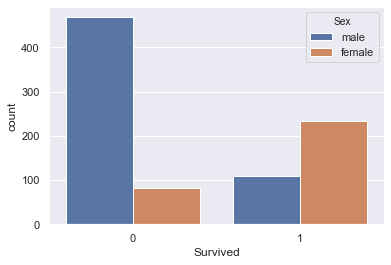

In [12]:
sns.countplot(x='Survived',data=train_df,hue='Sex')

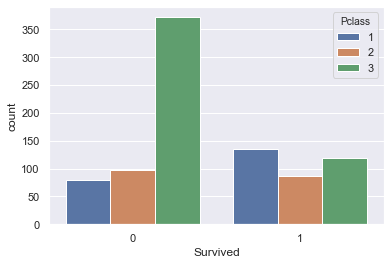

In [13]:
sns.countplot(x='Survived',data=train_df,hue='Pclass')

In [14]:
 train_df.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

(7, 0)

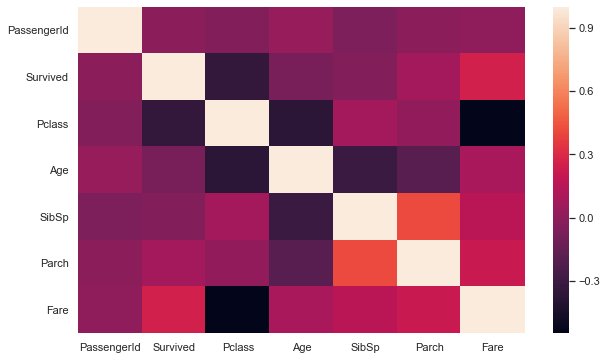

In [15]:
# Correlation map between numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr())
plt.ylim() # Orginally (6.5,0.5) which cut off the top and bottom. Have to re-set ylim to fix. 
plt.ylim((7, 0))

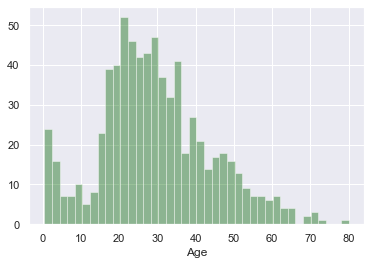

In [16]:
sns.distplot(train_df['Age'].dropna(),kde=False,bins=40,color='darkgreen')

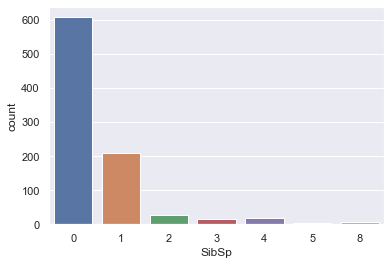

In [17]:
sns.countplot(x='SibSp',data=train_df)
#I can potentially merge everything 2 and above. 

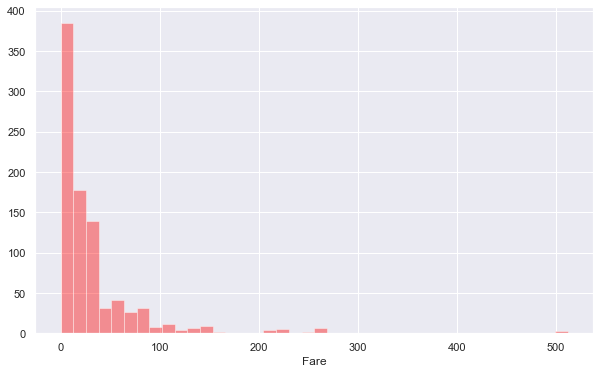

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['Fare'],kde=False,bins=40,color='red')

In [19]:
# Data cleaning

In [20]:
#Create a title column

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].lstrip())

In [22]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
#What titles are present?

In [24]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Ms                1
Don               1
Sir               1
Name: Title, dtype: int64

In [26]:
# There are many titles which are only held by one person or a few people.
# Ill relabel the rare titles to a title called Rare.

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

In [28]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [29]:
#Dropping the name column since I got all the info I needed out of it. 

In [30]:
for dataset in combine:
    dataset.drop('Name',axis=1,inplace=True)

In [31]:
train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [32]:
# There are many NaN age values which need to be addressed.
# Could possibly impute them using Pclass. 

In [33]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

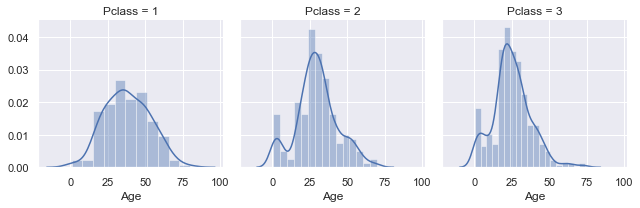

In [34]:
g = sns.FacetGrid(train_df,col='Pclass')
g.map(sns.distplot, 'Age',kde=True)

In [35]:
for x,y in train_df[['Pclass','Age']].groupby('Pclass',as_index=False).mean().values:
    print(x,y)

1.0 38.233440860215055
2.0 29.87763005780347
3.0 25.14061971830986


In [36]:
train_df[['Pclass','Age']].groupby('Pclass',as_index=False).median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [37]:
# As suspected, lower classes have a lower average and median age. 

In [38]:
train_df[['Age','Pclass']].iloc[886:890]

,Age,Pclass
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [39]:
#train_df[['Age','Pclass']].apply(impute_age,axis=1).iloc[886:890]

In [40]:
# Loop through datasets
for dataset in combine:
    # Get average age for each pclass
    for pclass, age in dataset[['Pclass','Age']].groupby('Pclass',as_index=False).mean().values:
        if (pclass == 1.0):
            pclass_age1 = age
        elif (pclass == 2.0):
            pclass_age2 = age
        elif (pclass == 3.0):
            pclass_age3 = age
        #
    # Replace the missing values with the imputed age value    
    def impute_age(page1,page2,page3,x):
        Age = x[0]
        Pclass = x[1]
    
        if (pd.isnull(Age)):
            if (Pclass == 1):
                return round(page1,1)
            elif (Pclass == 2):
                return round(page2,1)
            elif (Pclass == 3):
                return round(page3,1)
        else:
            return Age
    dataset['Age'] = dataset[['Age','Pclass']].apply(lambda x: impute_age(pclass_age1,pclass_age2,pclass_age3,x),axis=1)
    

In [41]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [42]:
train_df[['Age','Pclass']].iloc[886:890]

,Age,Pclass
886,27.0,2
887,19.0,1
888,25.1,3
889,26.0,1


In [43]:
# There are only two entries which have missing values for the embarked variable.

In [44]:
train_df.loc[pd.isnull(train_df['Embarked'])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [45]:
#They paid the same fare. They are in the same class. No sibs spouse or parch. Both female.

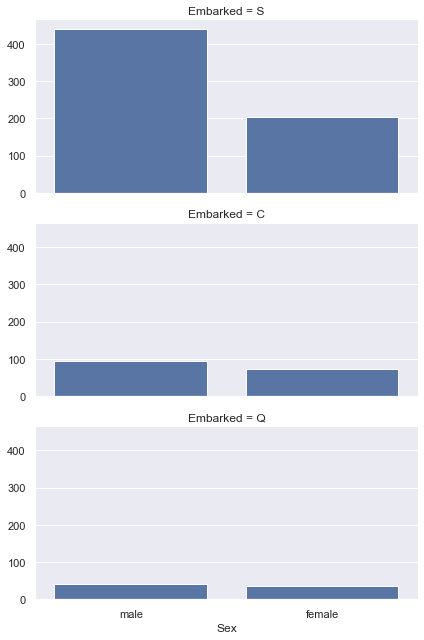

In [46]:
g = sns.FacetGrid(train_df,row='Embarked',height=3,aspect=2)
g.map(sns.countplot,'Sex',order=['male','female'])

In [47]:
# The most probable location for them to have embarked is S

In [48]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [49]:
for dataset in combine:
    dataset['Embarked'].fillna('S',inplace=True)

In [50]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [51]:
#Exploring the cabin feature.

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [53]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
# Get first character of the cabin variable
train_df.loc[train_df['Cabin'].notnull(), 'Cabin'] = train_df[train_df['Cabin'].notnull()]['Cabin'].apply(lambda x: x[0])
test_df.loc[test_df['Cabin'].notnull(), 'Cabin'] = test_df[test_df['Cabin'].notnull()]['Cabin'].apply(lambda x: x[0])

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [56]:
# Fill in missing values with "Missing"
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x if pd.notnull(x) else 'Missing')
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x if pd.notnull(x) else 'Missing')

In [57]:
train_df[['Cabin','Survived']].groupby('Cabin').mean()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
Missing,0.299854
T,0.000000


In [58]:
train_df[['Cabin','Pclass','Survived']].groupby('Cabin').mean()

,Pclass,Survived
Cabin,,
A,1.000000,0.466667
B,1.000000,0.744681
C,1.000000,0.593220
D,1.121212,0.757576
E,1.312500,0.750000
F,2.384615,0.615385
G,3.000000,0.500000
Missing,2.639010,0.299854
T,1.000000,0.000000


In [59]:
# Converting T to A in the cabin variable.
train_df.loc[train_df['Cabin'] == 'T', 'Cabin'] = 'A'
test_df.loc[test_df['Cabin'] == 'T', 'Cabin'] = 'A'

In [60]:
# Grouping the cabin variable based on Pclass
train_df['Cabin'] = train_df['Cabin'].replace(['A','B','C'],'ABC')
train_df['Cabin'] = train_df['Cabin'].replace(['D','E'],'DE')
train_df['Cabin'] = train_df['Cabin'].replace(['F','G'],'FG')

test_df['Cabin'] = test_df['Cabin'].replace(['A','B','C'],'ABC')
test_df['Cabin'] = test_df['Cabin'].replace(['D','E'],'DE')
test_df['Cabin'] = test_df['Cabin'].replace(['F','G'],'FG')

In [61]:
train_df['Cabin'].unique()

array(['Missing', 'ABC', 'DE', 'FG'], dtype=object)

In [62]:
train_df['Cabin'].value_counts()

Missing    687
ABC        122
DE          65
FG          17
Name: Cabin, dtype: int64

In [63]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [64]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

In [65]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Missing,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,ABC,C,Mrs


In [66]:
# Combine SibSP and Parch into one variable
for dataset in combine:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [67]:
train_df.head(7)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22.0,A/5 21171,7.2500,Missing,S,Mr,1
1,2,1,1,female,38.0,PC 17599,71.2833,ABC,C,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,Missing,S,Miss,0
3,4,1,1,female,35.0,113803,53.1000,ABC,S,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,Missing,S,Mr,0
5,6,0,3,male,25.1,330877,8.4583,Missing,Q,Mr,0
6,7,0,1,male,54.0,17463,51.8625,DE,S,Mr,0


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    object 
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  Relatives    891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [69]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   Age          891 non-null    int32 
 5   Ticket       891 non-null    object
 6   Fare         891 non-null    int32 
 7   Cabin        891 non-null    object
 8   Embarked     891 non-null    object
 9   Title        891 non-null    object
 10  Relatives    891 non-null    int64 
dtypes: int32(2), int64(4), object(5)
memory usage: 69.7+ KB


In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22,A/5 21171,7,Missing,S,Mr,1
1,2,1,1,female,38,PC 17599,71,ABC,C,Mrs,1
2,3,1,3,female,26,STON/O2. 3101282,7,Missing,S,Miss,0
3,4,1,1,female,35,113803,53,ABC,S,Mrs,1
4,5,0,3,male,35,373450,8,Missing,S,Mr,0


In [72]:
# Calculating the length of each ticket
# Will probably not include this in the model

In [73]:
for dataset in combine:
    dataset['Tlength'] = dataset['Ticket'].apply(lambda x: len(x.replace(' ','')))

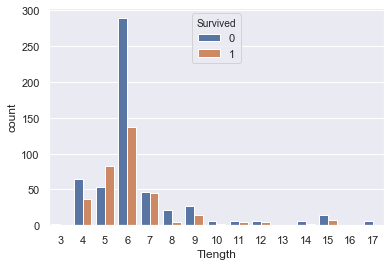

In [74]:
sns.countplot(x='Tlength',data=train_df,hue='Survived')

In [75]:
train_df.loc[(train_df['Tlength'] > 9 )|( train_df['Tlength'] == 3), 'Tlength'] = 0

In [76]:
train_df[train_df['Tlength'] == 3]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives,Tlength


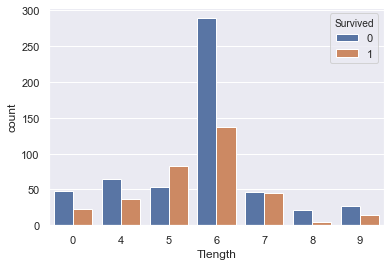

In [77]:
sns.countplot(x='Tlength',data=train_df,hue='Survived')

In [78]:
for dataset in combine:
    dataset.drop('Ticket',axis=1,inplace=True)

In [79]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Relatives,Tlength
0,1,0,3,male,22,7,Missing,S,Mr,1,8
1,2,1,1,female,38,71,ABC,C,Mrs,1,7
2,3,1,3,female,26,7,Missing,S,Miss,0,0
3,4,1,1,female,35,53,ABC,S,Mrs,1,6
4,5,0,3,male,35,8,Missing,S,Mr,0,6


In [80]:
# Conveting the Pclass variables to strings
def rename_temp(x):
    if (x == 1):
        return 'FirstClass'
    elif (x == 2):
        return 'SecondClass'
    elif (x == 3):
        return 'ThirdClass'


In [81]:
for dataset in combine:
    dataset['Pclass'] = dataset['Pclass'].apply(rename_temp)

In [82]:
for dataset in combine:
    dataset = dataset.join(pd.get_dummies(dataset['Pclass'],drop_first=False)).drop('Pclass',axis=1)

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Relatives,Tlength
0,1,0,ThirdClass,male,22,7,Missing,S,Mr,1,8
1,2,1,FirstClass,female,38,71,ABC,C,Mrs,1,7
2,3,1,ThirdClass,female,26,7,Missing,S,Miss,0,0
3,4,1,FirstClass,female,35,53,ABC,S,Mrs,1,6
4,5,0,ThirdClass,male,35,8,Missing,S,Mr,0,6


In [84]:
# Creating the relevant dummies
train_df = train_df.join(pd.get_dummies(train_df['Pclass'],drop_first=False)).drop('Pclass',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Pclass'],drop_first=False)).drop('Pclass',axis=1)

In [85]:
train_df = train_df.join(pd.get_dummies(train_df['Sex'],drop_first=False)).drop('Sex',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Sex'],drop_first=False)).drop('Sex',axis=1)

In [86]:
train_df = train_df.join(pd.get_dummies(train_df['Embarked'],drop_first=False)).drop('Embarked',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Embarked'],drop_first=False)).drop('Embarked',axis=1)

In [87]:
train_df = train_df.join(pd.get_dummies(train_df['Title'],drop_first=False)).drop('Title',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Title'],drop_first=False)).drop('Title',axis=1)

In [88]:
train_df.head()

,PassengerId,Survived,Age,Fare,Cabin,Relatives,Tlength,FirstClass,SecondClass,ThirdClass,female,male,C,Q,S,Master,Miss,Mr,Mrs,Rare
0,1,0,22,7,Missing,1,8,0,0,1,0,1,0,0,1,0,0,1,0,0
1,2,1,38,71,ABC,1,7,1,0,0,1,0,1,0,0,0,0,0,1,0
2,3,1,26,7,Missing,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,4,1,35,53,ABC,1,6,1,0,0,1,0,0,0,1,0,0,0,1,0
4,5,0,35,8,Missing,0,6,0,0,1,0,1,0,0,1,0,0,1,0,0


In [89]:
#This part will convert age to ordinal values.

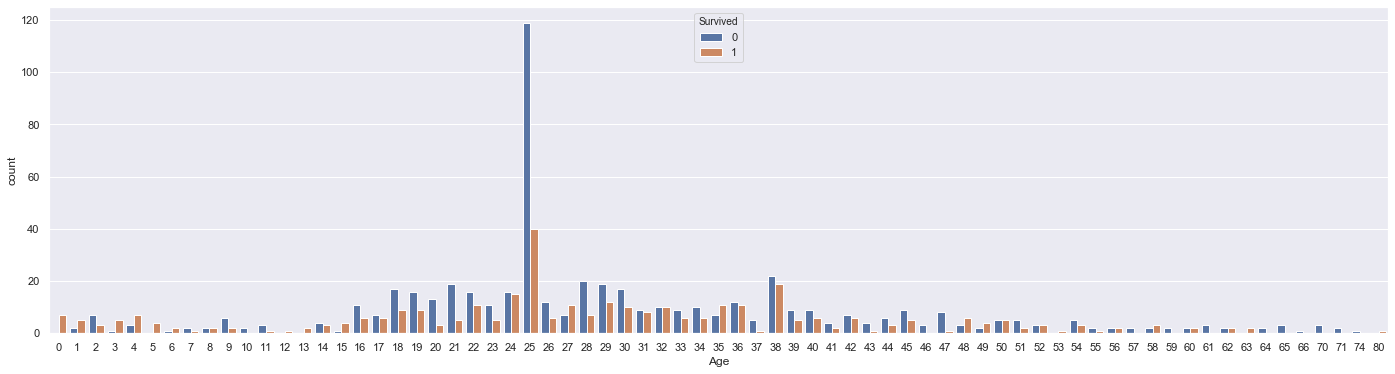

In [90]:
plt.figure(figsize=(24,6))
sns.countplot(x='Age',data=train_df,hue='Survived')

<Figure size 864x432 with 0 Axes>

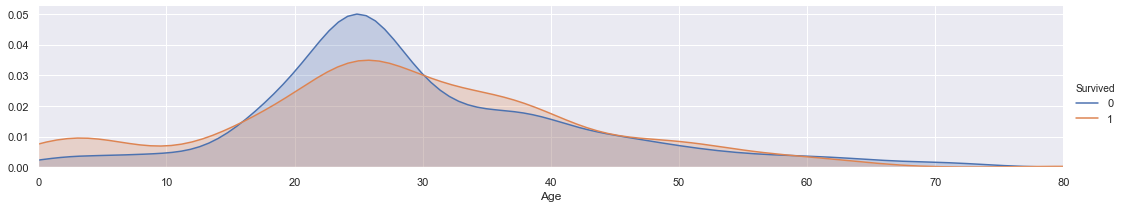

In [91]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(train_df,hue='Survived',aspect=5)
g.map(sns.kdeplot,'Age',shade=True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()

(0, 16)

<Figure size 864x432 with 0 Axes>

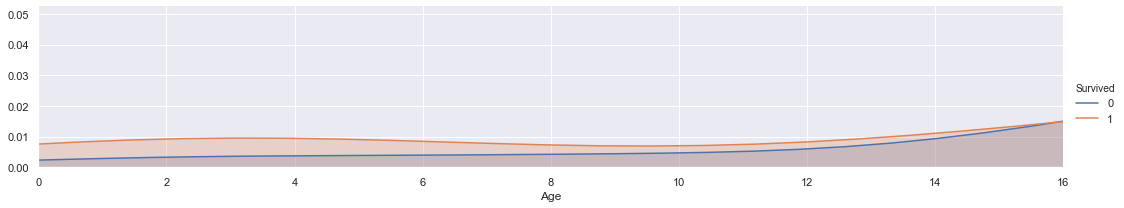

In [92]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(train_df,hue='Survived',aspect=5)
g.map(sns.kdeplot,'Age',shade=True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()
plt.xlim(0,16) #0 to 16 More likely to survive

(16, 30)

<Figure size 864x432 with 0 Axes>

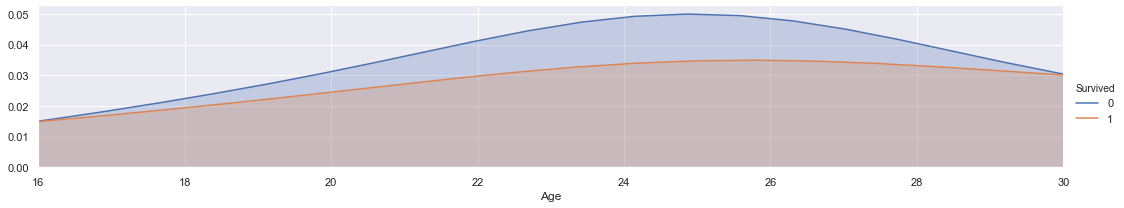

In [93]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(train_df,hue='Survived',aspect=5)
g.map(sns.kdeplot,'Age',shade=True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()
plt.xlim(16,30)

(30, 80.0)

<Figure size 864x432 with 0 Axes>

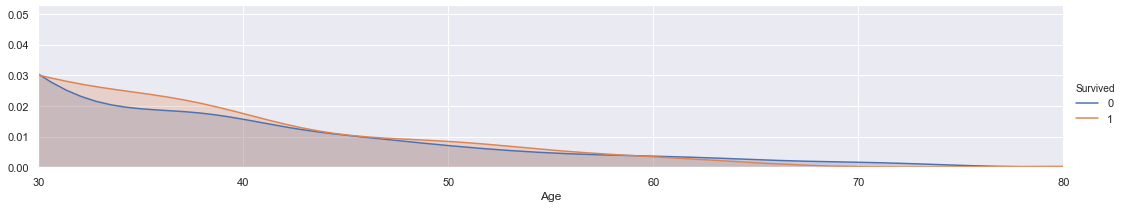

In [94]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(train_df,hue='Survived',aspect=5)
g.map(sns.kdeplot,'Age',shade=True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()
plt.xlim(30,)

In [95]:
train_df.loc[(train_df['Age'] >= 0)&(train_df['Age'] <= 16),'Age'] = 1
train_df.loc[(train_df['Age'] > 16)&(train_df['Age'] <= 30),'Age'] = 2
train_df.loc[(train_df['Age'] > 30)&(train_df['Age'] <= 90),'Age'] = 3
test_df.loc[(test_df['Age'] >= 0)&(test_df['Age'] <= 16),'Age'] = 1
test_df.loc[(test_df['Age'] > 16)&(test_df['Age'] <= 30),'Age'] = 2
test_df.loc[(test_df['Age'] > 30)&(test_df['Age'] <= 90),'Age'] = 3

In [96]:
train_df['Age'] = train_df['Age'].map({1:'Young',2:'Middle',3:'Old'})
test_df['Age'] = test_df['Age'].map({1:'Young',2:'Middle',3:'Old'})

In [97]:
# Creating the age dummies

In [98]:
train_df = train_df.join(pd.get_dummies(train_df['Age'],drop_first=False)).drop('Age',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Age'],drop_first=False)).drop('Age',axis=1)

In [99]:
train_df = train_df.join(pd.get_dummies(train_df['Cabin'],drop_first=False)).drop('Cabin',axis=1)
test_df = test_df.join(pd.get_dummies(test_df['Cabin'],drop_first=False)).drop('Cabin',axis=1)

In [100]:
train_df.head()

,PassengerId,Survived,Fare,Relatives,Tlength,FirstClass,SecondClass,ThirdClass,female,male,...,Mr,Mrs,Rare,Middle,Old,Young,ABC,DE,FG,Missing
0,1,0,7,1,8,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
1,2,1,71,1,7,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3,1,7,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,53,1,6,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,5,0,8,0,6,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [101]:
test_df.head()

,PassengerId,Fare,Relatives,Tlength,FirstClass,SecondClass,ThirdClass,female,male,C,...,Mr,Mrs,Rare,Middle,Old,Young,ABC,DE,FG,Missing
0,892,7,0,6,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,893,7,1,6,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,894,9,0,6,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,895,8,0,6,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,896,12,2,7,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [102]:
cols = train_df.columns

In [103]:
cols_test = test_df.columns

In [104]:
train_df.columns

Index(['PassengerId', 'Survived', 'Fare', 'Relatives', 'Tlength', 'FirstClass',
       'SecondClass', 'ThirdClass', 'female', 'male', 'C', 'Q', 'S', 'Master',
       'Miss', 'Mr', 'Mrs', 'Rare', 'Middle', 'Old', 'Young', 'ABC', 'DE',
       'FG', 'Missing'],
      dtype='object')

In [105]:
test_df.columns

Index(['PassengerId', 'Fare', 'Relatives', 'Tlength', 'FirstClass',
       'SecondClass', 'ThirdClass', 'female', 'male', 'C', 'Q', 'S', 'Master',
       'Miss', 'Mr', 'Mrs', 'Rare', 'Middle', 'Old', 'Young', 'ABC', 'DE',
       'FG', 'Missing'],
      dtype='object')

In [106]:
#Our data has now been cleaned and is ready for use in the various models.

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer,RobustScaler

In [108]:
# Scale both the train and test set. Fitting only on the train set to prevent leakage
columns = ['Fare','Tlength','Relatives']
for column in columns:
    scaler = StandardScaler()
    train_df[column] = scaler.fit_transform(train_df[column].values.reshape(-1,1))
    test_df[column] = scaler.transform(test_df[column].values.reshape(-1,1))

In [109]:
test_df.head()

,PassengerId,Fare,Relatives,Tlength,FirstClass,SecondClass,ThirdClass,female,male,C,...,Mr,Mrs,Rare,Middle,Old,Young,ABC,DE,FG,Missing
0,892,-0.498948,-0.560975,0.283427,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,893,-0.498948,0.059160,0.283427,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,894,-0.458687,-0.560975,0.283427,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,895,-0.478817,-0.560975,0.283427,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,896,-0.398295,0.679295,0.798802,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [110]:
train_df.head()

,PassengerId,Survived,Fare,Relatives,Tlength,FirstClass,SecondClass,ThirdClass,female,male,...,Mr,Mrs,Rare,Middle,Old,Young,ABC,DE,FG,Missing
0,1,0,-0.498948,0.059160,1.314177,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
1,2,1,0.789405,0.059160,0.798802,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3,1,-0.498948,-0.560975,-2.808822,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,0.427056,0.059160,0.283427,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,5,0,-0.478817,-0.560975,0.283427,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [111]:
# Importing the relevant tensorflow and sklearn packages

In [125]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

In [113]:
# Train test split
X = train_df[['Fare', 'Relatives', 'FirstClass','SecondClass', 'ThirdClass', 'female', 'male', 'C', 'Q', 'S', 'Master','Miss', 'Mr', 'Mrs', 'Rare', 'Middle', 'Old', 'Young', 'ABC', 'DE','FG', 'Missing']] #'Age'
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_new = np.asarray(X)
y_new = np.asarray(y)

In [114]:
# Define a function that returns the model it compiles.
def build_model(hp):
    model = Sequential()
    
    # Hyperparameters tuning
    hp_units_first = hp.Int('unitsInput',min_value=3,max_value=16,step=1)
    model.add(Dense(units=hp_units_first, activation='relu'))
    hp_dropout_first = hp.Choice('DropoutInput',values=[0.0,0.2])
    model.add(Dropout(hp_dropout_first))
    # Custom number of layers
    number_hidden_layers = hp.Choice('hidden_layers', values=[0,1,2,3])
    if number_hidden_layers != 0:
        with hp.conditional_scope('hidden_layers',[number_hidden_layers]):
            for number_layers in range(number_hidden_layers):
                hp_units = hp.Int(name=('units'+str(number_layers)),min_value=2,max_value=16,step=1)
                model.add(Dense(units=hp_units, activation='relu'))
                hp_dropout = hp.Choice(name=('Dropout'+str(number_layers)),values=[0.0,0.2])
                model.add(Dropout(hp_dropout))
    
    model.add(Dense(1,activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimzer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [116]:
# Defining the tuner with the Hyperband algorithm
tuner = kt.Hyperband(build_model,
                    objective='val_accuracy',
                    max_epochs=200,
                    factor=3,
                    directory=f'my_dir_{time.time()}',
                    project_name=f'first_keras_tuner_3{time.time()}')

In [117]:
stop_early = EarlyStopping(monitor='val_loss',patience=10)

In [118]:
# Searching for the best parameters
tuner.search(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[stop_early],batch_size=32)

Trial 254 Complete [00h 00m 03s]
val_accuracy: 0.807692289352417

Best val_accuracy So Far: 0.8429487347602844
Total elapsed time: 00h 06m 25s
INFO:tensorflow:Oracle triggered exit


In [119]:
best_hps = tuner.get_best_hyperparameters()[0]

In [120]:
# Best parameters
best_hps.values

{'unitsInput': 5,
 'DropoutInput': 0.2,
 'hidden_layers': 3,
 'learning_rate': 0.001,
 'units0': 12,
 'Dropout0': 0.0,
 'units1': 4,
 'Dropout1': 0.2,
 'units2': 14,
 'Dropout2': 0.2,
 'tuner/epochs': 67,
 'tuner/initial_epoch': 23,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '156e600904aaa5403e5db3ea3e6b3f9d'}

In [121]:
# Building the final model using the best parameters found in the hyperband search
model_final = tuner.hypermodel.build(best_hps)
model_final.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),
          callbacks=[EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=False)],
          batch_size=32)

Train on 579 samples, validate on 312 samples
Epoch 1/200
579/579 [==============================] - 1s 2ms/sample - loss: 0.6901 - accuracy: 0.6235 - val_loss: 0.6837 - val_accuracy: 0.6026
Epoch 2/200
579/579 [==============================] - 0s 67us/sample - loss: 0.6773 - accuracy: 0.6252 - val_loss: 0.6748 - val_accuracy: 0.6026
Epoch 3/200
579/579 [==============================] - 0s 66us/sample - loss: 0.6656 - accuracy: 0.6235 - val_loss: 0.6640 - val_accuracy: 0.6026
Epoch 4/200
579/579 [==============================] - 0s 67us/sample - loss: 0.6574 - accuracy: 0.6269 - val_loss: 0.6542 - val_accuracy: 0.6026
Epoch 5/200
579/579 [==============================] - 0s 66us/sample - loss: 0.6449 - accuracy: 0.6235 - val_loss: 0.6414 - val_accuracy: 0.6026
Epoch 6/200
579/579 [==============================] - 0s 64us/sample - loss: 0.6458 - accuracy: 0.6235 - val_loss: 0.6331 - val_accuracy: 0.6026
Epoch 7/200
579/579 [==============================] - 0s 69us/sample - loss: 0

In [122]:
tf_losses = pd.DataFrame(model_final.history.history)

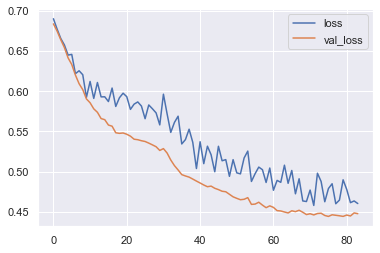

In [123]:
# Plotting the loss and the validation loss
tf_losses[['loss','val_loss']].plot()

In [124]:
# Predicting the classes and saving the results for potential submission
save = 0
if (save == 1):
    folder_name = "Results"
    sub_folder =  str(datetime.datetime.now().day) + " Day " + str(datetime.datetime.now().month) + " Month"
    hour_minute_second = str(datetime.datetime.now().hour) +" Hours " + str(datetime.datetime.now().minute) + " Minutes " + str(datetime.datetime.now().second) + " Seconds"
    
    os.makedirs(folder_name,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder+"/"+hour_minute_second,exist_ok=True)
    data = test_df[['Fare', 'Relatives', 'FirstClass','SecondClass', 'ThirdClass', 'female', 'male', 'C', 'Q', 'S', 'Master','Miss', 'Mr', 'Mrs', 'Rare', 'Middle', 'Old', 'Young', 'ABC', 'DE','FG', 'Missing']]
    test_df2 = np.asarray(data)

    ANN_pred = model_final.predict_classes(test_df2)
    ANN_pred = pd.DataFrame(ANN_pred,columns=['Survived'])
    ANN_predictions_df = test_df.join(ANN_pred)[['PassengerId','Survived']]
    ANN_predictions_df.to_csv('Results/'+sub_folder+'/'+hour_minute_second+'/'+'ANN.csv',index=False)
    
